In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['SimHei']

In [6]:
# 导入数据，解析survey_time列的值作为独立的日期列，指定字符集类型
train = pd.read_csv('./data/happiness_train_complete.csv', parse_dates=['survey_time'], encoding='latin-1')
test = pd.read_csv('./data/happiness_test_complete.csv', parse_dates=['survey_time'], encoding='latin-1')
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50


In [3]:
o=set(train['happiness'])
print(o)

{1, 2, 3, 4, 5, -8}


In [7]:
# 处理异常值
# 将happiness中的‘-8’无法回答，改为‘3’说不上幸福不幸福
train['happiness'] = train['happiness'].replace(-8, 3)

In [4]:
# 检查是否有缺失值
def check_missing(df):
    miss = df.isnull().sum().any()
    if miss:
        total_miss = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total_miss, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dType =str(df[col].dtype)
            data_type.append(dType)
        output['Types'] = data_type
        print(output[output['Total'] != 0])
        return np.transpose(output)
    else:
        return False
check_missing(train)

                 Total   Percent    Types
edu_other         7997  0.009996   object
edu_status        1120  0.001400  float64
edu_yr            1972  0.002465  float64
join_party        7176  0.008970  float64
property_other    7934  0.009917   object
hukou_loc            4  0.000005  float64
social_neighbor    796  0.000995  float64
social_friend      796  0.000995  float64
work_status       5049  0.006311  float64
work_yr           5049  0.006311  float64
work_type         5049  0.006311  float64
work_manage       5049  0.006311  float64
family_income        1  0.000001  float64
invest_other      7971  0.009964   object
minor_child       1066  0.001332  float64
marital_1st        828  0.001035  float64
s_birth           1718  0.002148  float64
marital_now       1770  0.002213  float64
s_edu             1718  0.002148  float64
s_political       1718  0.002148  float64
s_hukou           1718  0.002148  float64
s_income          1718  0.002148  float64
s_work_exper      1718  0.002148  

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,int64,int64,datetime64[ns],int64,int64,int64,...,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64


In [8]:
# 填充缺失值，hukou_loc、family_income以均值填充
train['hukou_loc'] = train['hukou_loc'] .fillna(4)
train['family_income'] = train['family_income'] .fillna(train['family_income'].mean())

In [9]:
# 计算调查者年龄，调查年份-出生年份
import datetime
train['survey_time'] = train['survey_time'].dt.year  # 调查时间datetime转换为年
train['age'] = train['survey_time'] - train['birth']
test['survey_time'] = test['survey_time'].dt.year  
test['age'] = test['survey_time'] - test['birth']
train['age'].head()

0    56
1    23
2    48
3    72
4    21
Name: age, dtype: int64

In [8]:
# 显示数据的统计量，均值、标准差、最小值、分位数、最大值
train.describe()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9,age
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0,8000.00000,8000.000000,8000.00000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000
mean,4000.50000,3.866625,1.405500,15.155375,42.564750,70.619000,2015.0,1.53000,1964.707625,1.37350,...,70.809500,68.170000,62.737625,66.320125,62.794187,67.064000,66.09625,65.626750,67.153750,50.292375
std,2309.54541,0.818792,0.491019,8.917100,27.187404,38.747503,0.0,0.49913,16.842865,1.52882,...,21.184742,20.549943,24.771319,22.049437,23.463162,21.586817,23.08568,23.827493,22.502203,16.842865
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.0,1.00000,1921.000000,-8.00000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,18.000000
25%,2000.75000,4.000000,1.000000,7.000000,18.000000,37.000000,2015.0,1.00000,1952.000000,1.00000,...,60.000000,60.000000,50.000000,60.000000,55.000000,60.000000,60.00000,60.000000,60.000000,38.000000
50%,4000.50000,4.000000,1.000000,15.000000,42.000000,73.000000,2015.0,2.00000,1965.000000,1.00000,...,79.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000,50.000000
75%,6000.25000,4.000000,2.000000,22.000000,65.000000,104.000000,2015.0,2.00000,1977.000000,1.00000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,63.000000
max,8000.00000,5.000000,2.000000,31.000000,89.000000,134.000000,2015.0,2.00000,1997.000000,8.00000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,94.000000


In [9]:
# 年龄与幸福指数的pearson相关系数，几乎不相关
train['happiness'].corr(train['age'], method='pearson') 

0.004704486424158729

In [10]:
# 家庭收入与幸福指数的pearson相关系数，几乎不相关
train['happiness'].corr(train['family_income'], method='pearson') 

0.05168655743647721

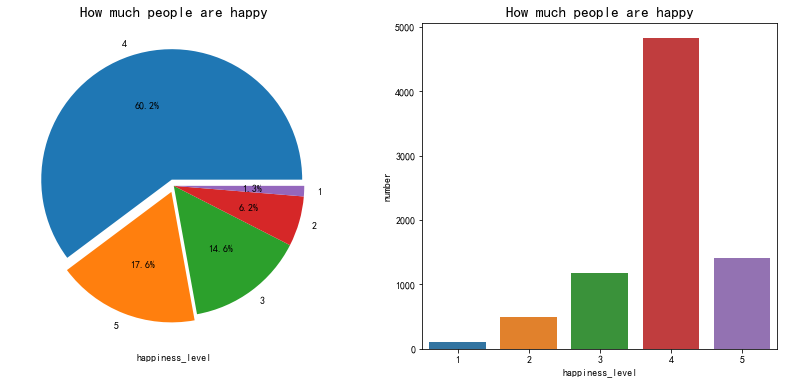

In [14]:
# 5个等级幸福感的柱状图，5个等级的占比图
f,ax=plt.subplots(1,2,figsize=(14,6))
# import matplotlib.pyplot as plt
# plt.rc("font",family="SimHei",size="12")  #用于解决中文显示不了的问题
# sns.set_style("whitegrid") 
# 部分分离开
explode = (0.05,0.05,0,0,0)
train['happiness'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],explode=explode)
ax[0].set_xlabel('happiness_level')
ax[0].set_ylabel('')
ax[0].set_title('How much people are happy',fontsize=15)
# 用seaborn的计数图

sns.countplot('happiness',data=train,ax=ax[1])
# ax[1] = train['happiness'].value_counts().plot.bar()
ax[1].set_title('How much people are happy',fontsize=15)
ax[1].set_xlabel('happiness_level')
ax[1].set_ylabel('number')
plt.show() 

In [12]:
## 分性别分析,1男，2女
train.groupby(['gender', 'happiness'])['happiness'].count()

gender  happiness
1       1              43
        2             216
        3             596
        4            2306
        5             599
2       1              61
        2             281
        3             575
        4            2512
        5             811
Name: happiness, dtype: int64

Text(0.5, 0.98, 'The proportion of happiness level in different gender')

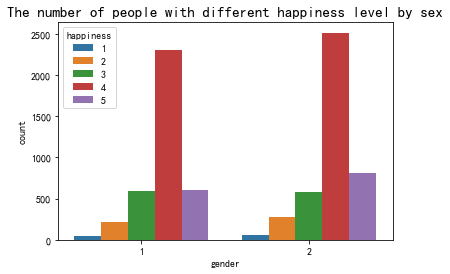

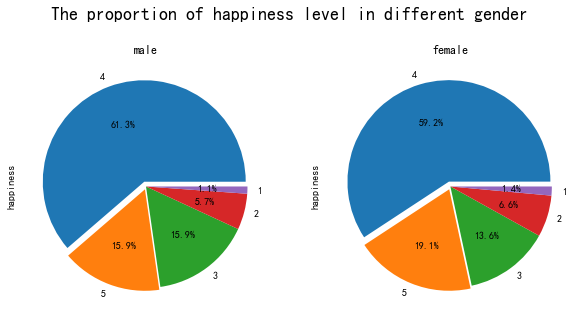

In [13]:
# 男女的幸福指数比较
# hue为色彩色度的意思，可以理解为hue决定具有多彩的标签
sns.countplot(x='gender', hue='happiness', data=train)
plt.title('The number of people with different happiness level by sex',fontsize=15)
# 在男性女性中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,2,figsize=(10,5))
# 部分分离开
explode = (0.05,0.03,0,0,0)

train['happiness'][train['gender']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='male')
train['happiness'][train['gender']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='female')
fig.suptitle('The proportion of happiness level in different gender', fontsize=18, verticalalignment='center')

Text(0.5, 0.98, '                                    The number of people with different happiness level by sample type')

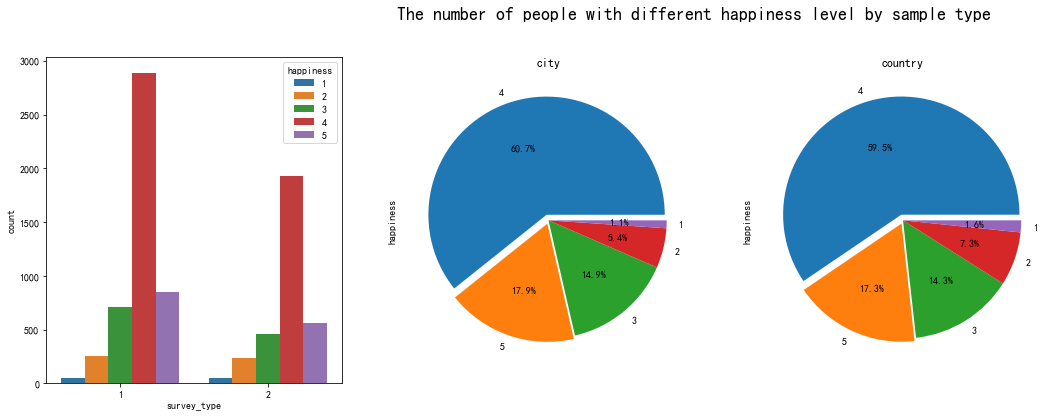

In [14]:
# 样本类型的幸福指数比较，1表示城市，2表示农村
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.countplot(x='survey_type', hue='happiness', data=train, ax=ax[0])
# 在样本类型中，5个happiness level所占比例pie图
explode = (0.05,0.03,0,0,0)
train['happiness'][train['survey_type']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], explode=explode,title='city')
train['happiness'][train['survey_type']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[2], explode=explode,title='country')
f.suptitle('                                    The number of people with different happiness level by sample type', fontsize=18, verticalalignment='center')

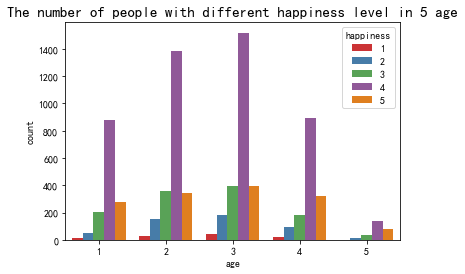

In [8]:
# 将年龄分阶段
## 按每个年龄阶段分析幸福感
# train.dtypes
combine=[train,test]
for dataset in combine:
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[(dataset['age'] > 64) & (dataset['age'] <= 80), 'age'] = 4
    dataset.loc[ dataset['age'] > 80, 'age'] = 5 
sns.countplot('age',hue='happiness',data=train,palette='Set1')
plt.title('The number of people with different happiness level in 5 age',fontsize=15)
train['age'] = train['age'].astype(int)

Text(0, 0.5, 'The number of people')

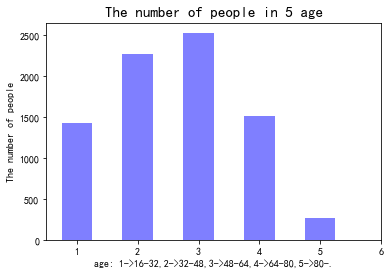

In [11]:
## 分年龄分析
# 绘制条形图，得到每个年龄段的频数
plt.hist(train['age'], range=(1,6), histtype='bar', align='left', color='blue',alpha=0.5)
plt.title('The number of people in 5 age',fontsize=15)
plt.xlabel('age: 1->16-32,2->32-48,3->48-64,4->64-80,5->80-.')
plt.ylabel('The number of people')

Text(0.5, 0.98, 'The proportion of happiness level in different age')

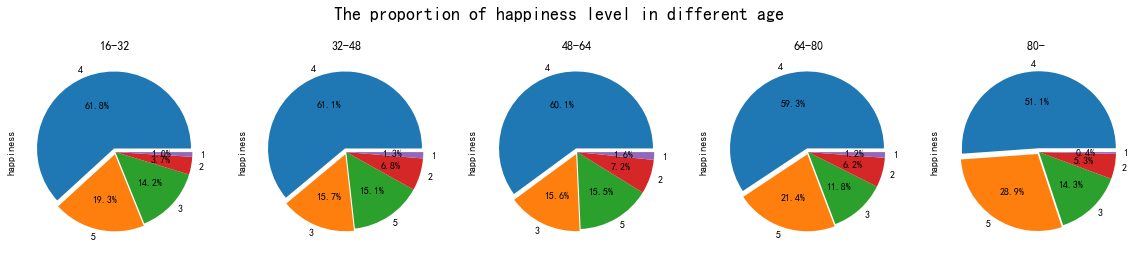

In [17]:
# 在各个年龄段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,5,figsize=(20,4))
# 部分分离开
explode = (0.05,0.03,0,0,0)
train['happiness'][train['age']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='16-32')
train['happiness'][train['age']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='32-48')
train['happiness'][train['age']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='48-64')
train['happiness'][train['age']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='64-80')
train['happiness'][train['age']==5].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[4], explode=explode,title='80- ')
fig.suptitle('The proportion of happiness level in different age', fontsize=18, verticalalignment='center')

Text(0.5, 0.98, 'The proportion of happiness level in different inc_ability')

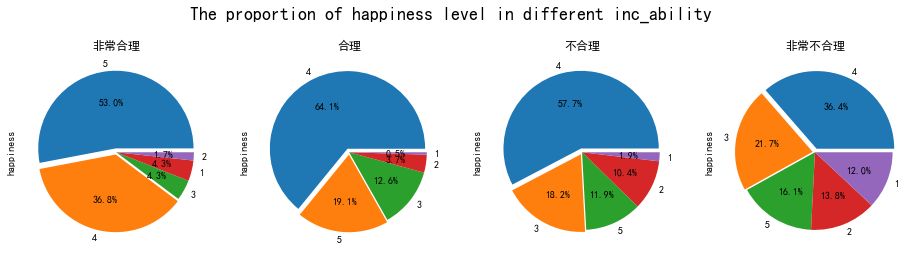

In [18]:
# 在收入合理四个阶段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,4,figsize=(16,4))
explode = (0.05,0.03,0,0,0)
train['happiness'][train['inc_ability']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='非常合理')
train['happiness'][train['inc_ability']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='合理')
train['happiness'][train['inc_ability']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='不合理')
train['happiness'][train['inc_ability']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='非常不合理')
fig.suptitle('The proportion of happiness level in different inc_ability', fontsize=18, verticalalignment='center')

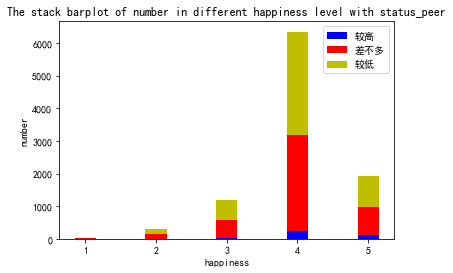

In [19]:
# 与同龄人比较社会经济地位，5个happiness level的堆叠条形图
index = np.arange(1,6)
x1 = train[train['status_peer']==1]['happiness'].groupby(train['happiness']).count()
x2 = train[train['status_peer']==2]['happiness'].groupby(train['happiness']).count()
x3 = train[train['status_peer']==3]['happiness'].groupby(train['happiness']).count()
width = 0.3

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# bottom=x，表示从x的值开始堆叠上去
plt.bar(x=index, height=x1, width=width, color='b', label='较高')
plt.bar(x=index, height=x2, width=width, color='r', bottom=x1, label='差不多') 
plt.bar(x=index, height=x2, width=width, color='y', bottom=x2, label='较低') 
plt.xlabel('happiness')
plt.ylabel('number')
plt.title('The stack barplot of number in different happiness level with status_peer')
plt.legend(loc='best')
plt.show()

Text(0.5, 0.98, 'The proportion of happiness level in different equity')

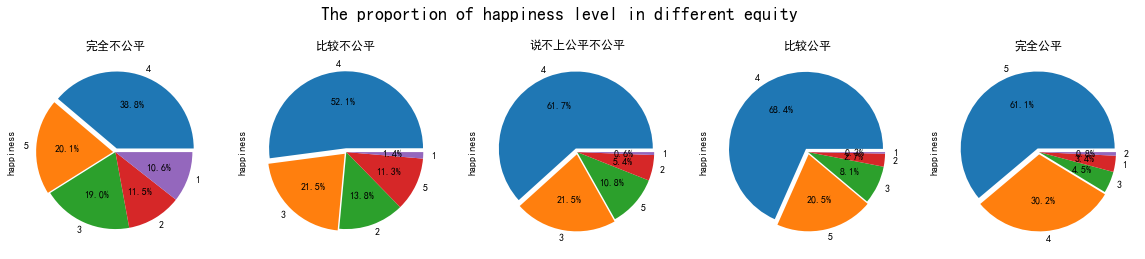

In [20]:
# 在社会公平5个阶段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,5,figsize=(20,4))
explode = (0.05,0.03,0,0,0)
train['happiness'][train['equity']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='完全不公平')
train['happiness'][train['equity']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='比较不公平')
train['happiness'][train['equity']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='说不上公平不公平')
train['happiness'][train['equity']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='比较公平')
train['happiness'][train['equity']==5].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[4], explode=explode,title='完全公平')
fig.suptitle('The proportion of happiness level in different equity', fontsize=18, verticalalignment='center')

Text(0.5, 1.0, 'The number of people with different work experence by age')

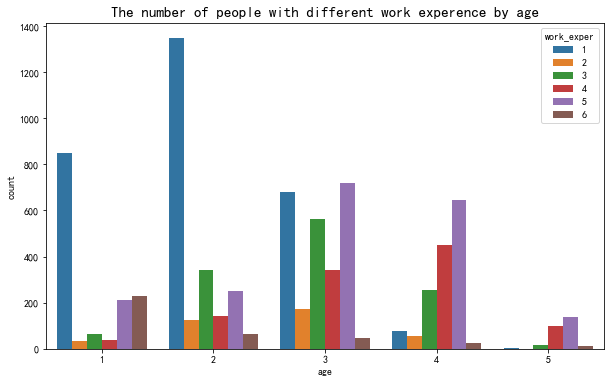

In [21]:
# 每个年龄段的具有不同工作经历的人数
f,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot('age',hue='work_exper', data=train)
plt.title('The number of people with different work experence by age',fontsize=15)

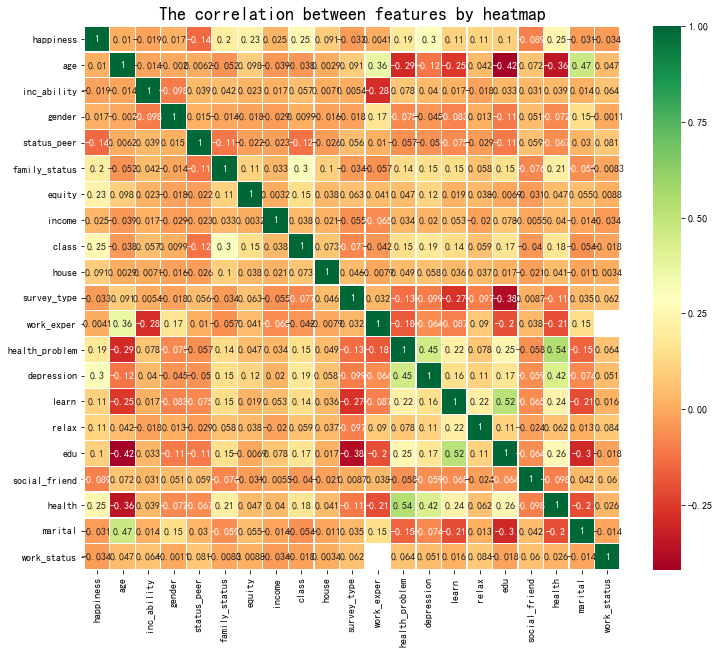

In [22]:
# 绘制seaborn中的heatmap热力图
# data.corr()：得到关联矩阵，cmap: 从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象，
# annot(annotate的缩写): 默认取值False；如果是True，在热力图每个方格写入数据
# linewidths:定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小
#外界层面（物质）：age，inc_ability，gender，status_peer，family_status，equity，class，income，house，survey_type，
#个人层面（精神）：health，work_exper，health_problem，depression，learn，relax，edu，social_friend,marital,work_status
sns.heatmap(train[['happiness','age','inc_ability','gender','status_peer','family_status','equity','income','class','house','survey_type',
                   'work_exper','health_problem','depression','learn','relax','edu','social_friend','health','marital','work_status']].corr(),
            annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf() # 获取当前的figure
fig.set_size_inches(12,10) # 设置尺寸
plt.title('The correlation between features by heatmap',fontsize=18)
plt.show()

In [23]:
train.select_dtypes(include=['object']).head()

,edu_other,property_other,invest_other
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [24]:
dellist = ['edu_other','property_other','invest_other']
for i in dellist:
    del train[i]
    del test[i]
train.to_csv('happiness_train_clean.csv',index=0)
test.to_csv('happiness_test_clean.csv',index=0)

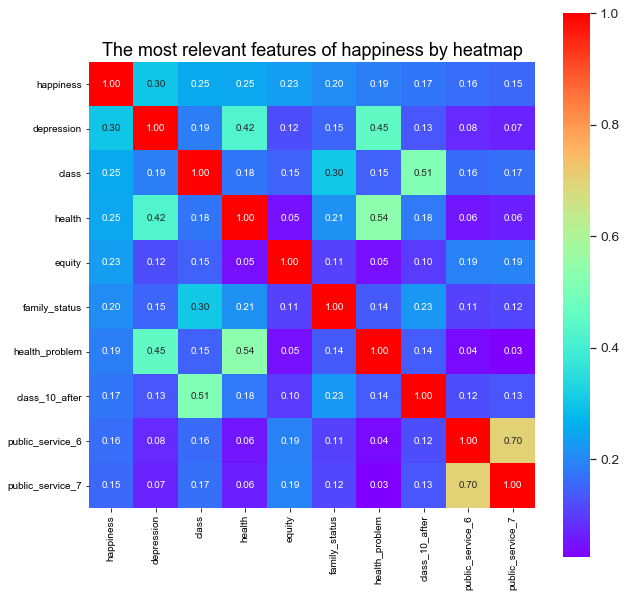

In [25]:
#查看与happiness较相关的20个特征
data_train=train[train["happiness"]!=-8]
k = 10#number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nlargest(k, "happiness")["happiness"].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10
                                                                              }, yticklabels=cols.values, xticklabels=cols.values,cmap='rainbow')
plt.title('The most relevant features of happiness by heatmap',fontsize=18)
plt.show()

Text(0.5, 0.98, 'The proportion of happiness level in different depression')

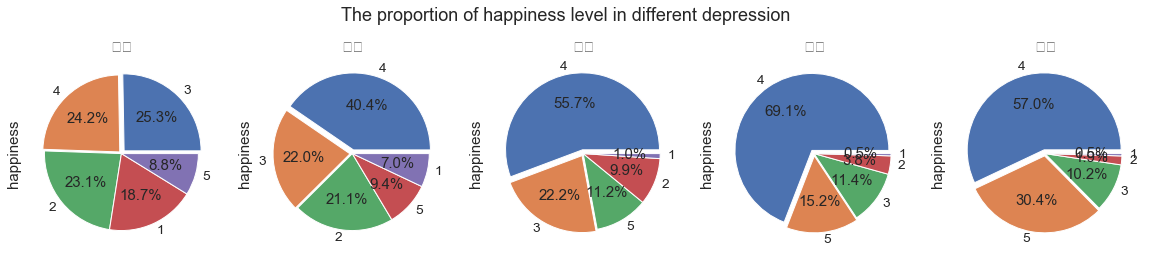

In [26]:
# 在过去的四周中您感到心情抑郁或沮丧的频繁程度
fig,ax1 = plt.subplots(1,5,figsize=(20,4))
explode = (0.05,0.03,0,0,0)
train['happiness'][train['depression']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='总是')
train['happiness'][train['depression']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='经常')
train['happiness'][train['depression']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='有时')
train['happiness'][train['depression']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='很少')
train['happiness'][train['depression']==5].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[4], explode=explode,title='从不')
fig.suptitle('The proportion of happiness level in different depression', fontsize=18, verticalalignment='center')

Text(0.5, 0.98, 'The proportion of happiness level in different health condition')

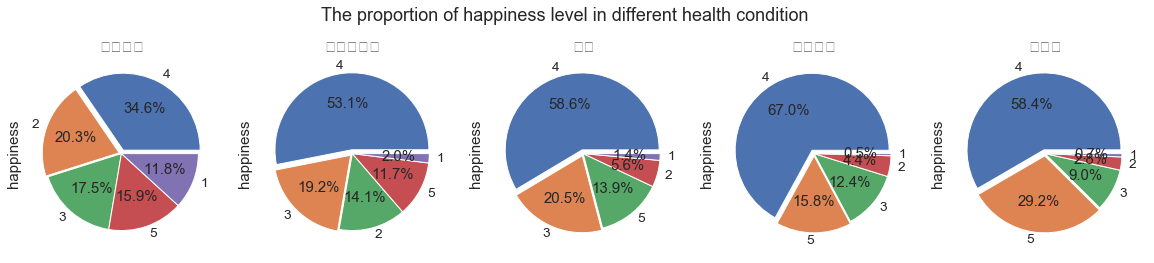

In [27]:
# 在过去的四周中您感到心情抑郁或沮丧的频繁程度
fig,ax1 = plt.subplots(1,5,figsize=(20,4))
explode = (0.05,0.03,0,0,0)
train['happiness'][train['health']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='很不健康')
train['happiness'][train['health']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='比较不健康')
train['happiness'][train['health']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='一般')
train['happiness'][train['health']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='比较健康')
train['happiness'][train['health']==5].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[4], explode=explode,title='很健康')
fig.suptitle('The proportion of happiness level in different health condition', fontsize=18, verticalalignment='center')

In [12]:
bins = np.arange(16, 101, 16)
bins

array([16, 32, 48, 64, 80, 96])

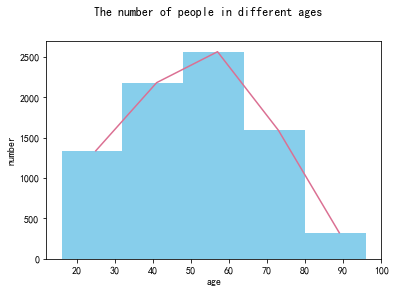

In [13]:
fig = plt.figure()
width=14
frequency_each,_,_= plt.hist(train['age'], bins = bins,color='skyblue')
fig.suptitle('The number of people in different ages', fontsize=12, verticalalignment='center')
plt.xlabel('age')
plt.ylabel('number')
plt.plot(bins[1:]-(width//2),frequency_each,color='palevioletred')#利用返回值来绘制区间中点连线

In [33]:
train.groupby('province')['happiness'].mean()


province
1     3.755051
2     3.735714
3     4.085714
4     4.083117
5     4.002865
6     3.652174
7     3.953052
8     3.728571
9     3.919847
10    4.058680
11    3.969231
12    3.774112
13    3.620939
15    3.962963
16    3.829545
17    4.107143
18    3.972028
19    3.991404
21    3.707373
22    3.718750
23    4.000000
24    3.843137
26    3.753927
27    3.989865
28    3.627907
29    3.769784
30    3.985075
31    3.851415
Name: happiness, dtype: float64

In [1]:
import numpy as np
from pyecharts import Map
province_distribution = {'河南': 3.972028, '北京': 4.083117, '河北': 4.107143, '辽宁': 3.989865, '江西': 3.829545, '上海': 3.755051, '安徽': 3.919847, '江苏': 3.962963, '湖南': 3.718750, '浙江': 3.991404, '广东': 3.774112, '湖北': 3.707373, '黑龙江': 3.851415, '陕西': 3.769784, '四川': 3.652174, '内蒙古': 4.085714, '重庆': 3.627907, '云南': 3.735714, '贵州': 3.753927, '吉林': 4.002865, '山西': 3.969231, '山东': 4.058680, '福建': 3.843137, '青海': 3.985075, '天津': 3.953052, '宁夏': 3.728571,'广西':3.620939,'甘肃':4.000000}
province = list(province_distribution.keys())
values = list(province_distribution.values())
# values = np.random.randint(1,100,size = 5)
test_map = Map("        The average happiness of people in different provinces",  width=1200, height=600)
test_map.add("", province, values,  visual_range=[3.6, 4.2],maptype='china', is_visualmap=True,
        visual_text_color='#000', is_label_show=True)

test_map.render(path="map.html") #notebook上会直接显示，不行就加上.render() 然后在当前文件目录上找